# Q3.1

In [1]:
import networkx as nx

In [1]:
# The first graph is the one Ioannis created in class:
from backend import graph
g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/hero-network.csv')
# The second one is the graph that links heroes to comics:
g_comics, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/edges.csv')

In [128]:
import pandas as pd
nodes = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/nodes.csv')
comic_nodes = nodes[nodes.type  == 'comic']
list(comic_nodes.node)

['2001 10',
 '2001 8',
 '2001 9',
 "A '00",
 "A '01",
 'A 100',
 'A 101',
 'A 102',
 'A 103',
 'A 104',
 'A 105',
 'A 106',
 'A 107',
 'A 108',
 'A 109',
 'A 10',
 'A 110',
 'A 111',
 'A 112',
 'A 113',
 'A 114',
 'A 115',
 'A 116',
 'A 117',
 'A 118',
 'A 119',
 'A 11',
 'A 120',
 'A 121',
 'A 122',
 'A 123',
 'A 124',
 'A 125',
 'A 126',
 'A 127',
 'A 128',
 'A 129',
 'A 12',
 'A 130',
 'A 131',
 'A 132',
 'A 133',
 'A 134',
 'A 135',
 'A 137',
 'A 138',
 'A 139',
 'A 13',
 'A 140',
 'A 141',
 'A 142',
 'A 143',
 'A 144',
 'A 145',
 'A 146',
 'A 147',
 'A 148',
 'A 149',
 'A 14',
 'A 150',
 'A 151',
 'A 152',
 'A 153',
 'A 154',
 'A 155',
 'A 156',
 'A 157',
 'A 158',
 'A 159',
 'A 1.5',
 'A 15',
 'A 160',
 'A 161',
 'A 162',
 'A 163',
 'A 164',
 'A 165',
 'A 166',
 'A 167',
 'A 168',
 'A 169',
 'A 16',
 'A 170',
 'A 171',
 'A 17/2',
 'A 172',
 'A 173',
 'A 174',
 'A 175',
 'A 176',
 'A 177',
 'A 178',
 'A 179',
 'A 17',
 'A 180',
 'A 181',
 'A 18/2',
 'A 182',
 'A 18/3',
 'A 183',
 

In [129]:
#g_comics.nodes()
#list(g_comics.degree)
a = sorted(g_comics.degree, key=lambda x: x[1], reverse=True)
'2001 10' in list(comic_nodes.node)

True

In [134]:
collabs = sorted(g_comics.degree, key=lambda x: x[1], reverse=True)
print('-'*50)
for i in collabs:
    if i[0] in list(comic_nodes.node)[0:15]:
        print(i[0], ':', i[1])    

--------------------------------------------------
A '00 : 23
A 105 : 21
A 100 : 20
A 103 : 18
A 102 : 14
A 108 : 13
A 107 : 11
A 106 : 10
A '01 : 9
A 104 : 9
A 101 : 8
A 109 : 7
2001 10 : 1
2001 8 : 1
2001 9 : 1


In [6]:
len(g_hero_net.nodes())

6421


SOME BASIC FEATURE:

-->  This network has 19087 nodes.
-->  The density of the network is 0.0081
-->  Since the density is under 50%, we say that the network is sparse.
-->  The average degree in the network is 5.04 nodes. 

**************************************************

SOME INFO ABOUT THE HUBS:

-->  The Hubs of the network are the following:
['SPIDER-MAN/PETER PARKER', 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'HUMAN TORCH/JOHNNY S', 'MR. FANTASTIC/REED R', 'HULK/DR. ROBERT BRUC', 'WOLVERINE/LOGAN', 'INVISIBLE WOMAN/SUE']

**********************************************************************

SOME INFO ABOUT THE COMICS:

The comic A '00 has 23 heroes
The comic A 100 has 20 heroes
The comic A 103 has 18 heroes
The comic A 102 has 14 heroes
The comic A '01 has 9 heroes
The comic A 104 has 9 heroes
The comic A 101 has 8 heroes
The comic 2001 10 has 1 heroes
The comic 2001 8 has 1 heroes
The comic 2001 9 has 1 heroes

*************

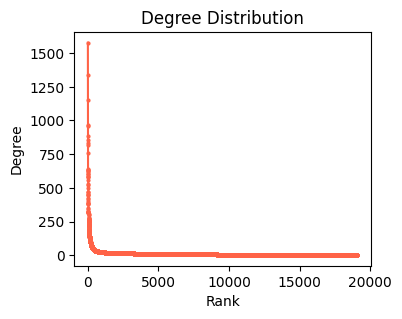

In [137]:
def features_network(graph, table = True, hubs = True, plot_type = False, plot_degree = False, N = 10):
    
    import networkx as nx
    import networkx.generators
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Basic features:
    print('')
    print('SOME BASIC FEATURE:')
    print('')
    if table == True:
        print('-->  This network has', len(graph.nodes()), 'nodes.')
        # We can compute the density with a simple formula (remind: both graphs are undirected)
        density = round((2*len(g_hero_net.edges())) / (len(g_hero_net.nodes()) * (len(g_hero_net.nodes())-1) ), 4)
        print('-->  The density of the network is', density)
        # Since the density varies between 0 and 1, we set 0.5 as a treshold to decide wheter the network is dense or sparse
        if density < 0.5:
            print('-->  Since the density is under 50%, we say that the network is sparse.')
        else:
            print('-->  Since the density is over 50%, we say that the network is dense.')    
        print('-->  The average degree in the network is', round(len(graph.edges()) / len(graph.nodes()), 2), 'nodes. ')
        print('')
        print('*'*50)
        print('')

    # Hubs
    if hubs == True:
        print('SOME INFO ABOUT THE HUBS:')
        print('')
        # We compute some centrality measure...
        degree_centrality = nx.degree_centrality(graph)
        # and we sort in descending order:
        degree_centrality_top = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))    
        print('-->  The Hubs of the network are the following:')
        print(list(degree_centrality_top.keys())[0:10])
        print('')
        print('*'*70)
        print('')

    # Number of collabs for each hero:
    if plot_type == True and graph == g_hero_net:
        print('SOME INFO ABOUT THE COLLABORATION OF EACH HERO:')
        print('')
        collabs = sorted(graph.degree, key=lambda x: x[1], reverse=True)
        for i in collabs[0:10]:
            print(i[0], ':', i[1], 'collabrations')
        print('')    
        print('*'*70)     

    # Number of eìheroes for each comic:
    if plot_type == True and graph == g_comics:
        print('SOME INFO ABOUT THE COMICS:')
        print('')
        n_heroes = sorted(graph.degree, key=lambda x: x[1], reverse=True)
        for i in n_heroes:
            if i[0] in list(comic_nodes.node)[0:N]:
                print('The comic', i[0], 'has', i[1], 'heroes') 
        print('')    
        print('*'*70)            


    # Degree Distribution
    print('')
    print('HERE IS THE DEGREE DISTRIBUTION:')
    if plot_degree == True:
        fig = plt.figure(figsize=(8, 8))
        axgrid = fig.add_gridspec(5, 4)

        degree_sequence = sorted((d for n, d in graph.degree()), reverse=True)
        ax1 = fig.add_subplot(axgrid[3:, :2])
        ax1.plot(degree_sequence, marker=".", markersize = 4, color = 'tomato')
        ax1.set_title("Degree Distribution")
        ax1.set_ylabel("Degree")
        ax1.set_xlabel("Rank")


features_network(g_comics, plot_type = True, plot_degree = True)